In [1]:
import pandas as pd
import warnings 
# 用来忽略seaborn绘图库产生的warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import datasets  
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df['target']=pd.Series(diabetes.target)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [33]:
# 拆分数据
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[diabetes.feature_names], df['target'], random_state=1)
len(x_train),len(x_test),len(y_train),len(y_test)

(331, 111, 331, 111)

In [34]:
from sklearn import linear_model
linear = linear_model.LinearRegression()


# 训练模型
linear.fit(x_train, y_train)

#训练结果
print('Coefficients :\n' , linear.coef_)
print('Intercept: n', linear.intercept_)



Coefficients :
 [  -7.85951708 -245.05253542  575.11667591  323.85372717 -519.77447335
  250.61132753    0.96367294  180.50891964  614.75959394   52.10619986]
Intercept: n 150.997693786
Residual sum of square: 2903.10
variance score: 0.44


In [38]:
# 模型评价
#对于线性回归来说，我们一般用均方差（Mean Squared Error, MSE）
#或者均方根差(Root Mean Squared Error, RMSE)在测试集上的表现来评价模型的好坏。

y_pred = linear.predict(x_test)

# 残差平方和 方差得分  
print("Residual sum of square: %.2f" %np.mean((y_pred - y_test) ** 2))  
print("variance score: %.2f" % linear.score(x_test, y_test))

from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Residual sum of square: 2903.10
variance score: 0.44
MSE: 2903.10000132
RMSE: 53.8804231732


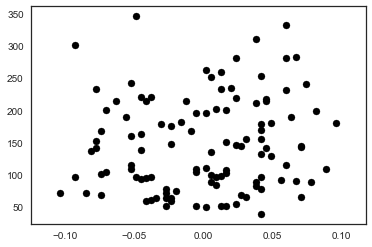

In [36]:
#绘图

plt.scatter(x_test['age'], y_test, color = 'black')  
#预测结果 直线表示  
#plt.plot(x_test['age'], linear.predict(y_test), color='blue', linewidth = 3)  
#plt.show()  

In [39]:
# 交叉验证
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linear, df[diabetes.feature_names], df['target'], cv=10)

In [43]:
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(df['target'], predicted))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(df['target'], predicted)))

MSE: 2999.03228568
RMSE: 54.7634210553


In [44]:
# 可以看出，采用交叉验证模型的MSE更大
# 主要原因是我们这里是对所有折的样本做测试集对应的预测值的MSE，
# 而前面仅仅对25%的测试集做了MSE。两者的先决条件并不同。